<a href="https://colab.research.google.com/github/mobarakol/tutorial_notebooks/blob/main/p_value.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In general, 0.05 is used as the cutoff or threshold for significance.
This means a p–value that is greater than the significance level indicates that there is insufficient evidence in your sample to conclude that a non-zero correlation exists.

If p-value < 0.05, then those features data are significant for our exploration.<br>
If p-value > 0.05, then those features data may not be significant for us.

35
Percentage of numbers larger than 183.0 is 0.35%
Percentage of numbers further than the population mean of 170.0 by +/-13.0 is 0.77%


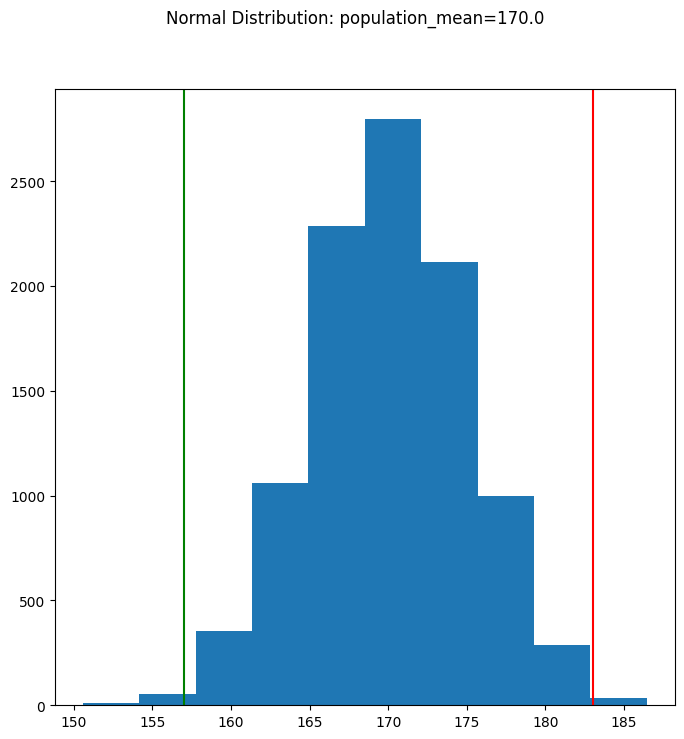

In [9]:
import matplotlib.pyplot as plt
import numpy as np

def pvalue_101(mu, sigma, samp_size, samp_mean=0, deltam=0):
    np.random.seed(1234)
    s1 = np.random.normal(mu, sigma, samp_size)
    if samp_mean > 0:
        print(len(s1[s1>samp_mean]))
        outliers = float(len(s1[s1>samp_mean])*100)/float(len(s1))
        print('Percentage of numbers larger than {} is {}%'.format(samp_mean, outliers))
    if deltam == 0:
        deltam = abs(mu-samp_mean)
    if deltam > 0 :
        outliers = (float(len(s1[s1>(mu+deltam)]))
                    +float(len(s1[s1<(mu-deltam)])))*100.0/float(len(s1))
        print('Percentage of numbers further than the population mean of {} by +/-{} is {}%'.format(mu, deltam, outliers))

    fig, ax = plt.subplots(figsize=(8,8))
    fig.suptitle('Normal Distribution: population_mean={}'.format(mu) )
    plt.hist(s1)
    plt.axvline(x=mu+deltam, color='red')
    plt.axvline(x=mu-deltam, color='green')
    plt.show()

pvalue_101(170.0, 5.0, 10000, 183.0) 

In [19]:
# from sklearn.datasets import load_boston
# boston_dataset = load_boston()

# import pandas as pd
# data = pd.DataFrame(data=boston_dataset.data, columns=boston_dataset.feature_names)
# data['PRICE']=boston_dataset.target
# data.head()


import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

feature_names = ['CRIM',	'ZN',	'INDUS',	'CHAS',	'NOX',	'RM',	'AGE',	'DIS',	'RAD',	'TAX',	'PTRATIO',		'B',	'PRICE']
data = pd.DataFrame(data=data, columns=feature_names)
data['PRICE']=target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,36.2


In [23]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
# If p-value < 0.05 -->Significant
# If p-value > 0.05 -->Not Significant

prices=data['PRICE']
features=data.drop('PRICE', axis=1)

X_train,X_test, Y_train, Y_test = train_test_split(features, prices, test_size = .2, random_state = 10)

x_incl_cons = sm.add_constant(X_train)
model = sm.OLS(Y_train, x_incl_cons)  #ordinary least square
results = model.fit()  #regresssion results

# results.params
# results.pvalues

pd.DataFrame({'coef': results.params , 'pvalue': round(results.pvalues,5)})

,coef,pvalue
const,21.560126,0.00038
CRIM,-0.177045,0.00000
ZN,0.053411,0.00116
INDUS,-0.060691,0.40175
CHAS,2.651655,0.01226
NOX,-19.788703,0.00002
RM,5.514505,0.00000
AGE,-0.040333,0.00968
DIS,-1.552461,0.00000
RAD,0.298275,0.00013
